In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/Fertility.csv")
df.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


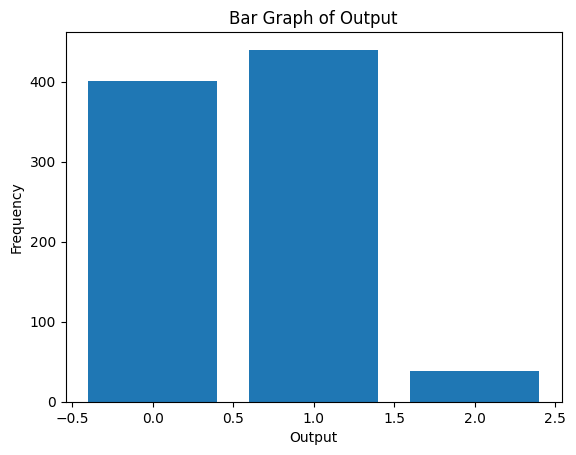

In [3]:
output_counts = df['Output'].value_counts()

plt.bar(output_counts.index, output_counts.values)
plt.title('Bar Graph of Output')
plt.xlabel('Output')
plt.ylabel('Frequency')
plt.show()

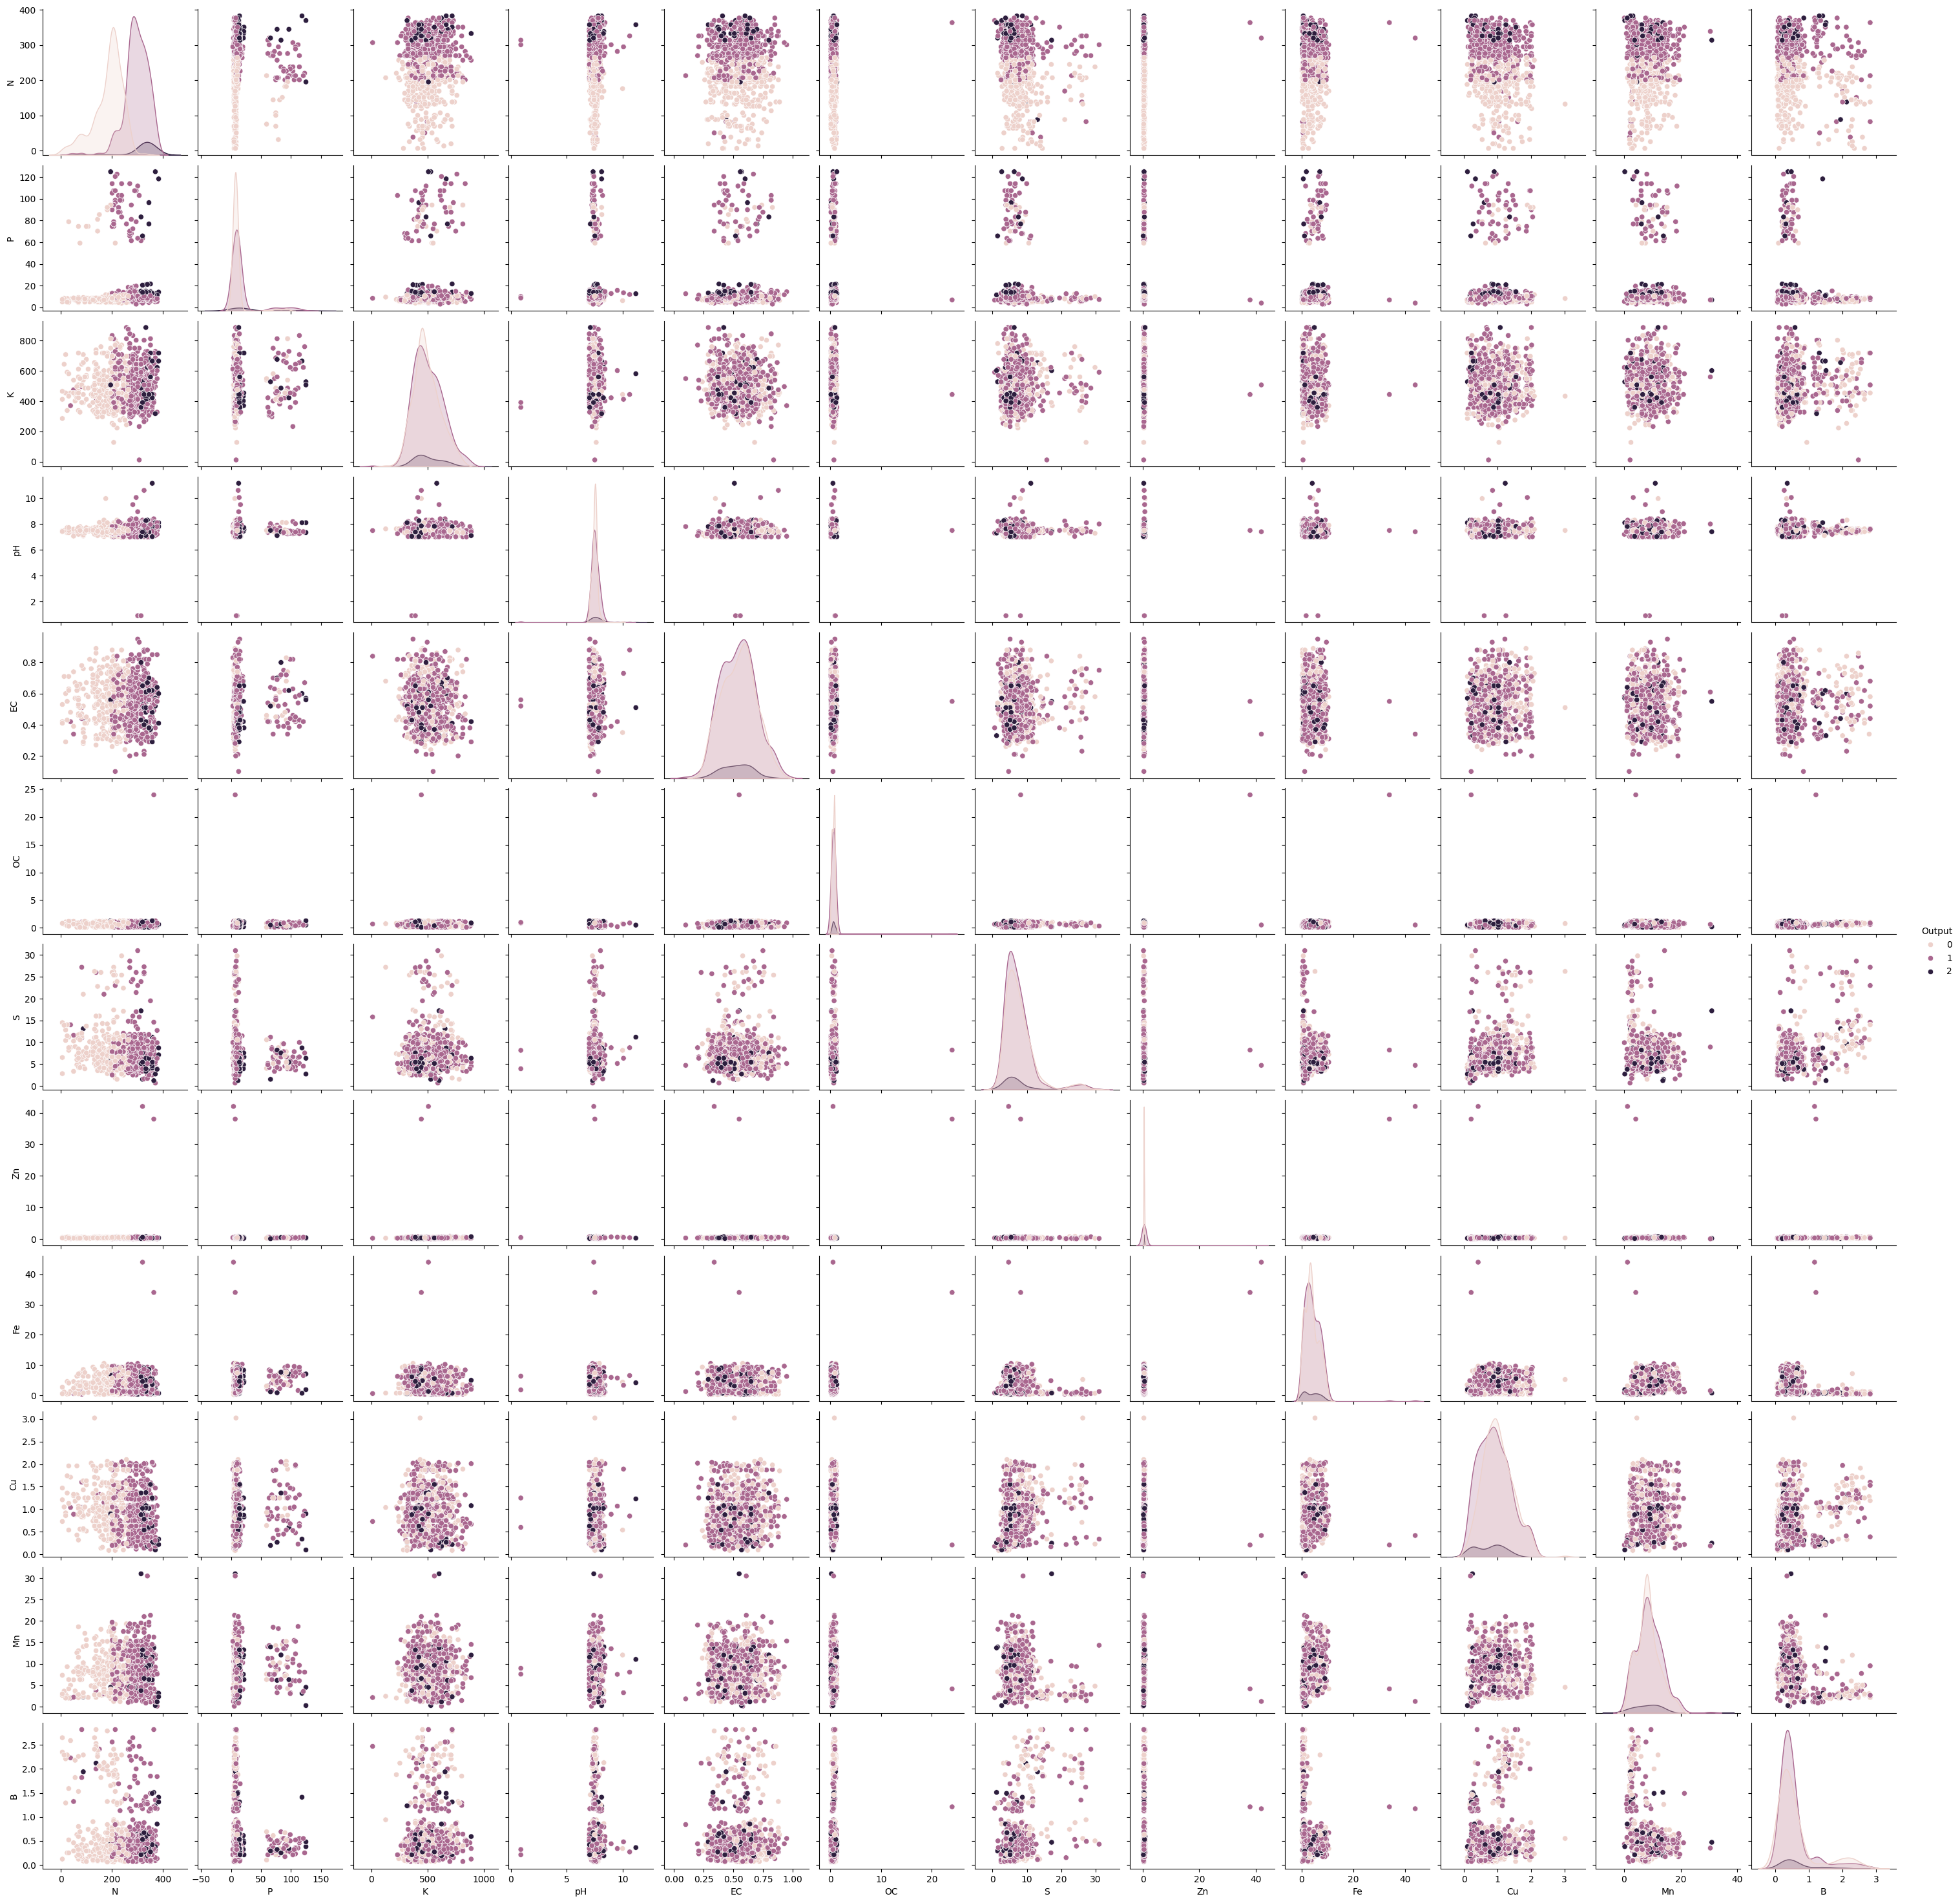

In [4]:
sns.pairplot(df, hue='Output', diag_kind='kde')
plt.show()

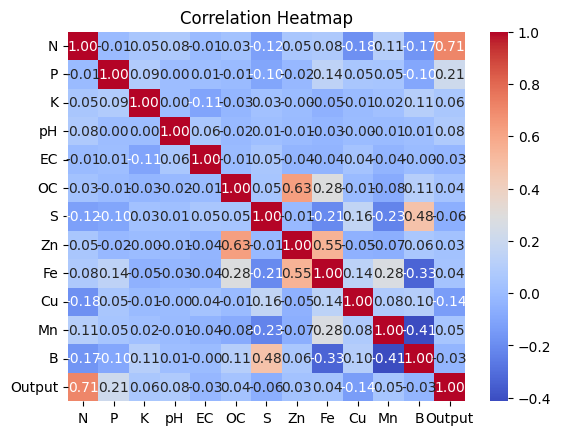

In [4]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [5]:
X = df.drop('Output', axis = 1)
y = df['Output']

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_prednb = naive_bayes.predict(X_test)
accuracynb = accuracy_score(y_test,y_prednb)
print(f'Accuracy Score: {accuracynb:.2%}')

Accuracy Score: 46.02%


In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
rf.score(X_test,predictions)

1.0

In [9]:
import joblib
joblib.dump(rf,'fertility.joblib')

['fertility.joblib']

In [10]:
import joblib
joblib.dump(scaler,'fertilityscaler.joblib')

['fertilityscaler.joblib']

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state= 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.multioutput import MultiOutputClassifier

cm = confusion_matrix(y_test, y_pred)

print("Accuracy for Decision Tree:",accuracy_score(y_test, y_pred))

Accuracy for Decision Tree: 0.8693181818181818


In [12]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= 0.26
|   |--- feature_1 <= -0.12
|   |   |--- feature_0 <= -0.07
|   |   |   |--- feature_8 <= -1.02
|   |   |   |   |--- feature_6 <= 0.45
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.45
|   |   |   |   |   |--- feature_6 <= 0.58
|   |   |   |   |   |   |--- feature_10 <= -1.22
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_10 >  -1.22
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  0.58
|   |   |   |   |   |   |--- feature_11 <= 3.98
|   |   |   |   |   |   |   |--- feature_0 <= -1.35
|   |   |   |   |   |   |   |   |--- feature_0 <= -2.72
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  -2.72
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.49
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.49
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.03
|  

In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
print('Accuracy for SVM is : {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy for SVM is : 0.82


In [12]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: d:\miniconda\envs\tf\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [14]:
from sklearn.metrics import classification_report
print("Decision Tree:")
print(classification_report(y_test,y_pred))
print("Naive Bayes:")
print(classification_report(y_test,y_prednb))
print("Random Forest:")
print(classification_report(y_test, predictions))
print("Support Vector Machine:")
print(classification_report(y_test, svm_pred))

Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        78
           1       0.87      0.89      0.88        88
           2       0.60      0.30      0.40        10

    accuracy                           0.87       176
   macro avg       0.79      0.70      0.73       176
weighted avg       0.86      0.87      0.86       176

Naive Bayes:
              precision    recall  f1-score   support

           0       0.50      0.94      0.65        78
           1       0.80      0.05      0.09        88
           2       0.15      0.40      0.22        10

    accuracy                           0.46       176
   macro avg       0.49      0.46      0.32       176
weighted avg       0.63      0.46      0.35       176

Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        78
           1       0.85      0.91      0.88        88
           2       0.00      0.0

/home/aaron/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaro

In [15]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Sequential Model Accuracy: {accuracy:.2%}')


2024-03-02 18:56:31.962996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-02 18:56:32.330398: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 18:56:33.064270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/aaron/anaconda3/envs/tf/lib/
2024-03-02 18:56:33.064455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 0.5422 - accuracy: 0.6420 

2024-03-02 18:56:37.068648: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


22/22 [==============================] - 2s 12ms/step - loss: 0.5422 - accuracy: 0.6420 - val_loss: 0.5400 - val_accuracy: 0.7670
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.1133 - accuracy: 0.8509 - val_loss: 0.4107 - val_accuracy: 0.7784
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: -0.0733 - accuracy: 0.8651 - val_loss: 0.2606 - val_accuracy: 0.7955
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: -0.2972 - accuracy: 0.8793 - val_loss: 0.0744 - val_accuracy: 0.8239
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: -0.5195 - accuracy: 0.8935 - val_loss: -0.1194 - val_accuracy: 0.8182
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: -0.9992 - accuracy: 0.8892 - val_loss: -0.3862 - val_accuracy: 0.8068
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: -1.6026 - accuracy: 0.8920 - val_loss: -0.7914 - val_accuracy: 0.8068
Epoch 8/50
22/22 [====

In [16]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    BatchNormalization(),
    tf.keras.layers.SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping_rnn])

y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype(int)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print(f'Simple RNN Model Accuracy: {accuracy_rnn:.2%}')


Epoch 1/50
22/22 [==============================] - 2s 39ms/step - loss: 0.5013 - accuracy: 0.6108 - val_loss: 0.5798 - val_accuracy: 0.5511
Epoch 2/50
22/22 [==============================] - 0s 18ms/step - loss: 0.3855 - accuracy: 0.6562 - val_loss: 0.5168 - val_accuracy: 0.5682
Epoch 3/50
22/22 [==============================] - 0s 17ms/step - loss: 0.3307 - accuracy: 0.6719 - val_loss: 0.4926 - val_accuracy: 0.5852
Epoch 4/50
22/22 [==============================] - 0s 17ms/step - loss: 0.2949 - accuracy: 0.6861 - val_loss: 0.4937 - val_accuracy: 0.6364
Epoch 5/50
22/22 [==============================] - 0s 15ms/step - loss: 0.2784 - accuracy: 0.6747 - val_loss: 0.4351 - val_accuracy: 0.5398
Epoch 6/50
22/22 [==============================] - 0s 17ms/step - loss: 0.2579 - accuracy: 0.6918 - val_loss: 0.4240 - val_accuracy: 0.5795
Epoch 7/50
22/22 [==============================] - 0s 16ms/step - loss: 0.2406 - accuracy: 0.6918 - val_loss: 0.4125 - val_accuracy: 0.5398
Epoch 8/50
22

In [17]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    BatchNormalization(),
    tf.keras.layers.LSTM(32),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping_lstm])

y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f'LSTM Model Accuracy: {accuracy_lstm:.2%}')


Epoch 1/50


2024-03-02 18:56:56.235653: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


22/22 [==============================] - 6s 68ms/step - loss: 0.6644 - accuracy: 0.5142 - val_loss: 0.6836 - val_accuracy: 0.5000
Epoch 2/50
22/22 [==============================] - 0s 10ms/step - loss: 0.5791 - accuracy: 0.5923 - val_loss: 0.6764 - val_accuracy: 0.5000
Epoch 3/50
22/22 [==============================] - 0s 7ms/step - loss: 0.5023 - accuracy: 0.6165 - val_loss: 0.6831 - val_accuracy: 0.5966
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.4466 - accuracy: 0.6449 - val_loss: 0.6497 - val_accuracy: 0.5739
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.4100 - accuracy: 0.6307 - val_loss: 0.7018 - val_accuracy: 0.4830
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.4033 - accuracy: 0.6548 - val_loss: 0.6311 - val_accuracy: 0.5909
Epoch 7/50
22/22 [==============================] - 0s 7ms/step - loss: 0.3620 - accuracy: 0.6378 - val_loss: 0.5884 - val_accuracy: 0.5852
Epoch 8/50
22/22 [===========

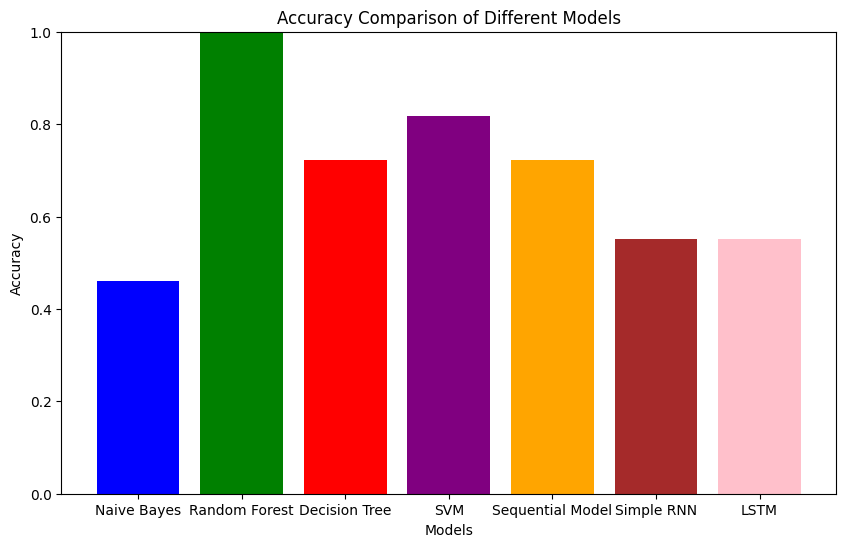

In [18]:
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM', 'Sequential Model', 'Simple RNN', 'LSTM']

accuracies = [accuracynb, rf.score(X_test, predictions), accuracy_score(y_test, y_pred),
              svm.score(X_test, y_test), accuracy, accuracy_rnn, accuracy_lstm]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0, 1]) 
plt.show()

In [19]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [20]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)